In [ ]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap

In [2]:
errors_approximation=pd.read_csv('../data/'+ 'all_errors' + '.csv',index_col=0)
display(errors_approximation)

#columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test"]
columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test", "n", "r"]
errors_approximation=errors_approximation[columns]
display(errors_approximation)



,sigma,function,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.014531,0.047835,0.000799,0.032633,0.019052,0.056589,0.001039,0.045034,0,0
1,0.0,leaky_ReLU,0.038948,0.250292,0.007437,0.197682,0.043878,0.270347,0.010081,0.218711,1,0
2,0.0,leaky_ReLU,0.007357,0.153327,0.005103,0.175677,0.009675,0.183943,0.006735,0.206563,2,0
3,0.0,leaky_ReLU,0.019419,0.311185,0.001652,0.067233,0.047197,0.320803,0.002061,0.080441,3,0
4,0.0,leaky_ReLU,0.006737,0.059373,0.002559,1.141700,0.014963,0.067198,0.002954,1.636346,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.2,tanh,0.077065,0.121007,0.025333,0.127387,0.108053,0.141900,0.040428,0.134413,5,2
656,0.2,tanh,0.082055,0.125623,0.083983,0.275630,0.116901,0.130110,0.118438,0.277328,6,2
657,0.2,tanh,0.092784,0.114085,0.094920,0.028182,0.122117,0.114988,0.116271,0.031750,7,2
658,0.2,tanh,0.090931,0.285506,0.059270,0.319420,0.115085,0.288816,0.077461,0.427289,8,2


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.019052,0.056589,0.001039,0.045034,0,0
1,0.0,leaky_ReLU,0.043878,0.270347,0.010081,0.218711,1,0
2,0.0,leaky_ReLU,0.009675,0.183943,0.006735,0.206563,2,0
3,0.0,leaky_ReLU,0.047197,0.320803,0.002061,0.080441,3,0
4,0.0,leaky_ReLU,0.014963,0.067198,0.002954,1.636346,4,0
...,...,...,...,...,...,...,...,...
655,0.2,tanh,0.108053,0.141900,0.040428,0.134413,5,2
656,0.2,tanh,0.116901,0.130110,0.118438,0.277328,6,2
657,0.2,tanh,0.122117,0.114988,0.116271,0.031750,7,2
658,0.2,tanh,0.115085,0.288816,0.077461,0.427289,8,2


In [3]:
#Melt dataframe to plot
#errors_approximation=pd.melt(errors_approximation,id_vars=["sigma","function", "rmse_nn_test","rmse_mdl_test", "n", "r"], var_name="error_train",value_name= "value_train")
#errors_approximation=pd.melt(errors_approximation,id_vars=["sigma","function",  "error_train", "value_train", "n", "r"], var_name="error_test", value_name= "value_test")



In [4]:
#Melt dataframe to plot
errors_approximation_train=errors_approximation[["sigma","function", "rmse_nn_train", "rmse_mdl_train","n", "r"]]
errors_approximation_train=pd.melt(errors_approximation_train,id_vars=["sigma","function", "n", "r"], var_name="error_train",value_name= "value_train")
display(errors_approximation_train)

errors_approximation_test=errors_approximation[["sigma","function", "rmse_nn_test", "rmse_mdl_test","n", "r"]]
errors_approximation_test=pd.melt(errors_approximation_test,id_vars= ["sigma","function", "n", "r"], var_name="error_test", value_name= "value_test")
display(errors_approximation_test)


,sigma,function,n,r,error_train,value_train
0,0.0,leaky_ReLU,0,0,rmse_nn_train,0.019052
1,0.0,leaky_ReLU,1,0,rmse_nn_train,0.043878
2,0.0,leaky_ReLU,2,0,rmse_nn_train,0.009675
3,0.0,leaky_ReLU,3,0,rmse_nn_train,0.047197
4,0.0,leaky_ReLU,4,0,rmse_nn_train,0.014963
...,...,...,...,...,...,...
1315,0.2,tanh,5,2,rmse_mdl_train,0.040428
1316,0.2,tanh,6,2,rmse_mdl_train,0.118438
1317,0.2,tanh,7,2,rmse_mdl_train,0.116271
1318,0.2,tanh,8,2,rmse_mdl_train,0.077461


,sigma,function,n,r,error_test,value_test
0,0.0,leaky_ReLU,0,0,rmse_nn_test,0.056589
1,0.0,leaky_ReLU,1,0,rmse_nn_test,0.270347
2,0.0,leaky_ReLU,2,0,rmse_nn_test,0.183943
3,0.0,leaky_ReLU,3,0,rmse_nn_test,0.320803
4,0.0,leaky_ReLU,4,0,rmse_nn_test,0.067198
...,...,...,...,...,...,...
1315,0.2,tanh,5,2,rmse_mdl_test,0.134413
1316,0.2,tanh,6,2,rmse_mdl_test,0.277328
1317,0.2,tanh,7,2,rmse_mdl_test,0.031750
1318,0.2,tanh,8,2,rmse_mdl_test,0.427289


In [5]:
errors_tanh_train=errors_approximation_train[errors_approximation_train['function']=='tanh']
errors_tanh_test=errors_approximation_test[errors_approximation_test['function']=='tanh']

errors_leaky_train=errors_approximation_train[errors_approximation_train['function']=='leaky_ReLU']
errors_leaky_test=errors_approximation_test[errors_approximation_test['function']=='leaky_ReLU']

display(errors_tanh_train)
display(errors_leaky_train)

,sigma,function,n,r,error_train,value_train
330,0.0,tanh,0,0,rmse_nn_train,0.048355
331,0.0,tanh,1,0,rmse_nn_train,0.015287
332,0.0,tanh,2,0,rmse_nn_train,0.119820
333,0.0,tanh,3,0,rmse_nn_train,0.043636
334,0.0,tanh,4,0,rmse_nn_train,0.019958
...,...,...,...,...,...,...
1315,0.2,tanh,5,2,rmse_mdl_train,0.040428
1316,0.2,tanh,6,2,rmse_mdl_train,0.118438
1317,0.2,tanh,7,2,rmse_mdl_train,0.116271
1318,0.2,tanh,8,2,rmse_mdl_train,0.077461


,sigma,function,n,r,error_train,value_train
0,0.0,leaky_ReLU,0,0,rmse_nn_train,0.019052
1,0.0,leaky_ReLU,1,0,rmse_nn_train,0.043878
2,0.0,leaky_ReLU,2,0,rmse_nn_train,0.009675
3,0.0,leaky_ReLU,3,0,rmse_nn_train,0.047197
4,0.0,leaky_ReLU,4,0,rmse_nn_train,0.014963
...,...,...,...,...,...,...
985,0.2,leaky_ReLU,5,2,rmse_mdl_train,0.010952
986,0.2,leaky_ReLU,6,2,rmse_mdl_train,0.140739
987,0.2,leaky_ReLU,7,2,rmse_mdl_train,0.041776
988,0.2,leaky_ReLU,8,2,rmse_mdl_train,0.113643


In [6]:
#Plot results
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 8*cm; height=6*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=12;size_ticks=10;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          
m_size=6

output_path='../results/'

resamples=100000; bs_seed=1111
ymin=2e-4;ymax=0.75

<Figure size 944.882x708.661 with 0 Axes>

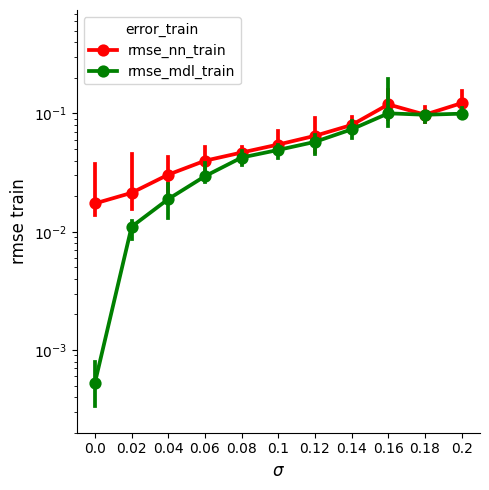

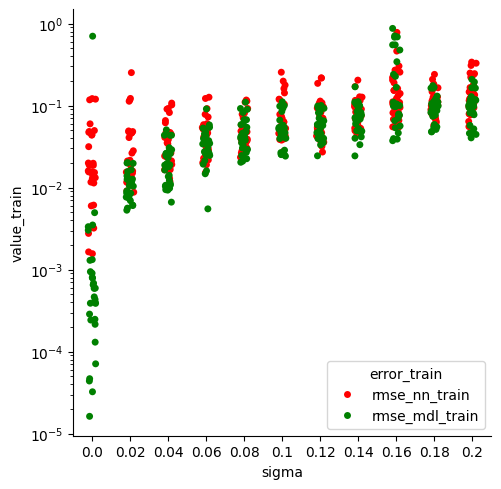

In [11]:
#tanh - rmse train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_tanh_train, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)


#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)

plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='approximation_medians_tanh'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Individual predictions
sns.catplot(data=errors_tanh_train, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
#plt.ylim(1e-5,1)
#plt.savefig(output_path+'dist_train_tanh',dpi=300)
#plt.show()

In [ ]:
#tanh - rmse test
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_tanh, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse test',fontsize=size_axis)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

plt.ylim(ymin,ymax)
name_fig='tanh_rmse_test.svg'
plt.savefig(output_path+name_fig,dpi=300)

#distribution of each simulation
#sns.catplot(data=errors_tanh, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(1e-3,10)
#plt.savefig(output_path+'dist_test_tanh',dpi=300)
#plt.show()

In [ ]:
#leaky - rmse train
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_leaky, x='sigma', y='value_train', hue="error_train", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse train',fontsize=size_axis)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)

plt.ylim(ymin,ymax)
name_fig='leaky_rmse_train.svg'
plt.savefig(output_path+name_fig,dpi=300)

#sns.catplot(data=errors_leaky, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")
#plt.ylim(0.9e-3,1.01)
#plt.savefig(output_path+'dist_train_leaky',dpi=300)
#plt.show()

In [ ]:
#leaky - rmse test
fig=figure(figsize=(width,height), dpi=300)

sns.catplot(data=errors_leaky, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse test',fontsize=size_axis)
#plt.legend(loc='lower right',fontsize=size_ticks,frameon=False)
plt.ylim(ymin,ymax)
name_fig='leaky_rmse_test.svg'
plt.savefig(output_path+name_fig,dpi=300)

#sns.catplot(data=errors_leaky, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
#plt.yscale("log")

#plt.savefig(output_path+'dist_test_leaky',dpi=300)
#plt.show()